# NAND Performances Analysis: disk size

This simulation tries to understand the different performances of a NAND disk changing the size of the disk. The write\read parameters, the garbage collector and a ratio of 2:1 between total blocks and page per blocks, are kept unchanged.

This simulation collects 100 M samples based on host write requests. The simulation runs a random writes of pages, 4 KiB each. So, the total amount of data to be written is 3.81 [GiB].

There are various NAND cells simulated. All NANDs have the following common features:

* page size:               4096 [Bytes] (4 [KiB]);
* page write time:         45 [µs];
* page read time:          120 [µs];
* block erase time:        1500 [µs];
* max bandwidth read:      32.55 [MiB\s] (theoretical);
* max bandwidth write:     86.81 [MiB\s] (theoretical);

The garbage collector cleans a block when at least 40% of its pages are dirty and only if at least 0.5 seconds are elapsed after the last gc execution. If a block is full during a write, the block is modified in-memory and erased;

Then, every NAND has a different number of total blocks, pages per block and disk capacity:

* **256M** blocks: 256, pages per block: 128;
* **512M** blocks: 512, pages per block: 256;
* **2G** blocks: 1024, pages per block: 512;
* **8G** blocks: 2048, pages per block: 1024.

In [1]:
# initialize
%matplotlib inline
import matplotlib.pyplot as plt
from simulator import analysis_helper as ah

# read the simulation data
sim_names = ("256M", "512M", "2G", "8G")
data = ah.load_data(sim_names, "../RESULTS/nand_size_test/")

## Page written host vs disk
This plot is in logaritmic scale and compares the host write requests (_x axis_) versus the effective disk writes (_y axis_). Ideally it should be linear: every host request correspond to a single disk write. Yet, due to the garbage collection or disk errors (_ie: disk is full_) the behaviour may change. 

As expected, the best result is **8G** as the number of written pages is largely less than the disk capacity. Smaller the disk and higher is the number of extra writes per page. 

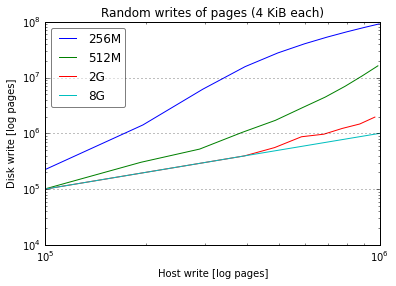

In [2]:
ah.inline_plot(sim_names, data, yid=6, xlog=True, ylog=True, show=False,
                xlabel="Host write [log pages]",
                ylabel="Disk write [log pages]")
# need extra parameters to better plotting
plt.axis([10 ** 5, 10 ** 6, 10 ** 4, 10 ** 8])  # [xmin, xmax, ymin, ymax]
plt.show()

## Host write time

This plot shows how much time is elapsed respect to the host write requests.

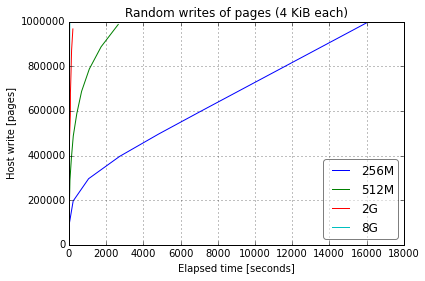

In [3]:
ah.plot_disk_write_time(sim_names, data)

## IOPS over written pages

This plot shows the IOPS as seen by the host over the write requests.

IOPS has an asymptotic behaviour. 

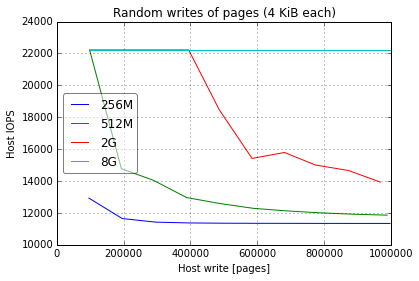

In [4]:
ah.plot_iops(sim_names, data)

## Amplification factor over written pages

This plot shows the amplification factor as seen by the host over the write requests. The amplification factor is defined as:
$$ A_f = \frac{W_s}{W_h} $$

Where:

* $W_s$ is the number of pages written actually by the disk;
* $W_h$ is the number of pages the host requests to write.

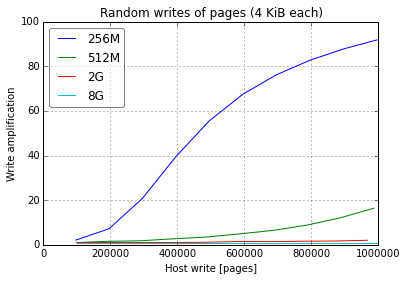

In [5]:
ah.plot_disk_af(sim_names, data)

## Write bandwidth over written pages

This plot shows the write bandwidth as seen by the host over the write requests.

As long the disk has free pages the bandwidth remains at the best. The activation of the garbage collector has a big impact on the bandwidth performance.

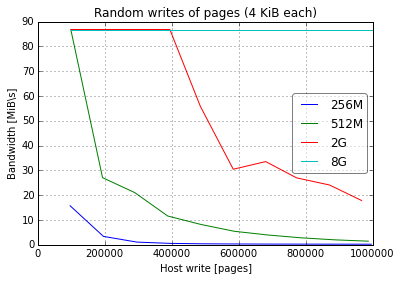

In [6]:
ah.plot_bandwidth(sim_names, data)

## Dirty pages over written pages

This plot shows the number of dirty pages over the write requests.

The maximum number of dirty pages is limited by the disk capacity.

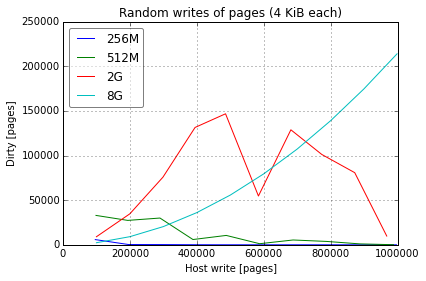

In [7]:
ah.plot_dirty_pages(sim_names, data)

## Write failures over written pages

This plot shows the number of failures (page not written due to disk errors) over the write requests.

All disks are able to fulfil the host requests.

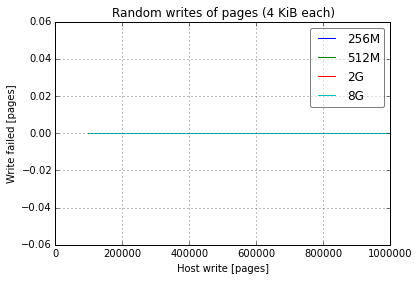

In [8]:
ah.plot_write_faiures(sim_names, data)

## Conclusions

As expected, bigger the disk and better are the performances as the garbage collector needs to run less frequently.